# 🏆 Analyzing NBA Game Statistics Data

Brayden Stach, Julian Loutzenhiser, Katherine Nunn

---

# 🛠️ Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

---

# 🎯 Research Questions

**Main Research Question:**
- ➡️ Which Stats are best used to predict the winner of any given NBA game?

# 📊 Data Description

Our dataset includes data from 65,000+ NBA games played between 1946 and 2023, from the Kaggle NBA Database: https://www.kaggle.com/datasets/wyattowalsh/basketball

### General Information
- game_id – A unique identifier for the game.
- game_date – The date the game was played.
- season_type – Indicates whether the game was part of the regular season, playoffs, or another category.
- team_id – Unique identifier for the team.
- team_name – Full name of the team.
- wl – Win/loss result for the team.
### Team Performance Metrics
- fgm – Field goals made.
- fga – Field goals attempted.
- fg_pct – Field goal percentage.
- fg3m – Three-pointers made.
- fg3a – Three-pointers attempted.
- fg3_pct – Three-point shooting percentage.
- ftm – Free throws made.
- fta – Free throws attempted.
- ft_pct – Free throw percentage.
- oreb – Offensive rebounds.
- dreb – Defensive rebounds.
- reb – Total rebounds.
- ast – Assists made.
- stl – Steals recorded.
- blk – Blocks made.
- tov – Turnovers committed.
- pf – Personal fouls committed.
- pts – Total points scored.
- plus_minus – Plus/minus rating.

**General Observations:**
- Seasons played before 1985 do not have data for most of the in game statistics, making them unhelpful in answering our reasearch question. They will not be included.
- Many columns included for the sake of connecting datasets in the NBA database include information that is unneccesarry for our purposes, such as team_abb, video available, etc.
- This dataset does not include modern advanced statistics such as SRS.
- Each row represents a matchup between two teams. Two make traing modles easier, we will modify the csv so each game only has one team's stats with one W/L. 

In [2]:
# Load the data
gamedata = pd.read_csv('game.csv')

# Drop columns not needed
columns_to_drop = ['season_id', 'game_id','team_abbreviation_home', 'team_abbreviation_away','matchup_home', 'matchup_away', 'video_available_home', 'video_available_away' ]
gamedata_dropped = gamedata.drop(columns=columns_to_drop)

# remove rows with NaNs
gamedata_dropped = gamedata_dropped[pd.to_datetime(gamedata_dropped['game_date']) >= pd.Timestamp('1985-04-17')]


## Transform CSV
Seperate the data so that each row represents one team per game to make model training much smoother.

In [3]:
# Copy home team data into dataframe with generic column names
home_df = gamedata_dropped.copy()
home_df['game_date'] = home_df['game_date']
home_df['season_type'] = home_df['season_type']
home_df['team_id'] = home_df['team_id_home']
home_df['team_name'] = home_df['team_name_home']
home_df['wl'] = home_df['wl_home']
home_df['fgm'] = home_df['fgm_home']
home_df['fga'] = home_df['fga_home']
home_df['fg_pct'] = home_df['fg_pct_home']
home_df['fg3m'] = home_df['fg3m_home']
home_df['fg3a'] = home_df['fg3a_home']
home_df['fg3_pct'] = home_df['fg3_pct_home']
home_df['ftm'] = home_df['ftm_home']
home_df['fta'] = home_df['fta_home']
home_df['ft_pct'] = home_df['ft_pct_home']
home_df['oreb'] = home_df['oreb_home']
home_df['dreb'] = home_df['dreb_home']
home_df['reb'] = home_df['reb_home']
home_df['ast'] = home_df['ast_home']
home_df['stl'] = home_df['stl_home']
home_df['blk'] = home_df['blk_home']
home_df['tov'] = home_df['tov_home']
home_df['pf'] = home_df['pf_home']
home_df['pts'] = home_df['pts_home']
home_df['plus_minus'] = home_df['plus_minus_home']

# Drop old columns
columns_to_drop_home = [
    "team_id_home", "team_name_home", "wl_home", "min", "fgm_home", 
    "fga_home", "fg_pct_home", "fg3m_home", "fg3a_home", "fg3_pct_home", 
    "ftm_home", "fta_home", "ft_pct_home", "oreb_home", "dreb_home", 
    "reb_home", "ast_home", "stl_home", "blk_home", "tov_home", "pf_home", 
    "pts_home", "plus_minus_home", "team_id_away",
    "team_name_away", "wl_away", 
    "fgm_away", "fga_away", "fg_pct_away", "fg3m_away", "fg3a_away", 
    "fg3_pct_away", "ftm_away", "fta_away", "ft_pct_away", "oreb_away", 
    "dreb_away", "reb_away", "ast_away", "stl_away", "blk_away", "tov_away", 
    "pf_away", "pts_away", "plus_minus_away"
]
home_data = home_df.drop(columns=columns_to_drop_home)


In [4]:
# Copy away team data into dataframe with generic column names
away_df = gamedata_dropped.copy()
away_df['game_date'] = away_df['game_date']
away_df['season_type'] = away_df['season_type']
away_df['team_id'] = away_df['team_id_away']
away_df['team_name'] = away_df['team_name_away']
away_df['wl'] = away_df['wl_away']
away_df['fgm'] = away_df['fgm_away']
away_df['fga'] = away_df['fga_away']
away_df['fg_pct'] = away_df['fg_pct_away']
away_df['fg3m'] = away_df['fg3m_away']
away_df['fg3a'] = away_df['fg3a_away']
away_df['fg3_pct'] = away_df['fg3_pct_away']
away_df['ftm'] = away_df['ftm_away']
away_df['fta'] = away_df['fta_away']
away_df['ft_pct'] = away_df['ft_pct_away']
away_df['oreb'] = away_df['oreb_away']
away_df['dreb'] = away_df['dreb_away']
away_df['reb'] = away_df['reb_away']
away_df['ast'] = away_df['ast_away']
away_df['stl'] = away_df['stl_away']
away_df['blk'] = away_df['blk_away']
away_df['tov'] = away_df['tov_away']
away_df['pf'] = away_df['pf_away']
away_df['pts'] = away_df['pts_away']
away_df['plus_minus'] = away_df['plus_minus_away']


# Drop old columns
columns_to_drop_away = [
    "team_id_home", "team_name_home", "wl_home", "min", "fgm_home", 
    "fga_home", "fg_pct_home", "fg3m_home", "fg3a_home", "fg3_pct_home", 
    "ftm_home", "fta_home", "ft_pct_home", "oreb_home", "dreb_home", 
    "reb_home", "ast_home", "stl_home", "blk_home", "tov_home", "pf_home", 
    "pts_home", "plus_minus_home", "team_id_away",
    "team_name_away", "wl_away", 
    "fgm_away", "fga_away", "fg_pct_away", "fg3m_away", "fg3a_away", 
    "fg3_pct_away", "ftm_away", "fta_away", "ft_pct_away", "oreb_away", 
    "dreb_away", "reb_away", "ast_away", "stl_away", "blk_away", "tov_away", 
    "pf_away", "pts_away", "plus_minus_away"
]
away_data = away_df.drop(columns=columns_to_drop_away)

In [5]:
# Combine home and away dataframes
final_df = pd.concat([home_data, away_data], ignore_index=True)

In [6]:
# Change W/L to 0/1
final_df['wl'] = final_df['wl'].map({'W': 1, 'L': 0})

In [7]:
# Check for null values
print(final_df.isnull().sum())

game_date        0
season_type      0
team_id          0
team_name        0
wl               4
fgm              0
fga              0
fg_pct           0
fg3m             0
fg3a             0
fg3_pct        487
ftm              0
fta              0
ft_pct           3
oreb             0
dreb             0
reb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
plus_minus       0
dtype: int64


In [8]:
# Drop the rows with NaNs
final_df = final_df.dropna()

In [9]:
# Sort the dataframe by date
final_df = final_df.sort_values(by='game_date')

In [10]:
# Reset the index after dropping
final_df = final_df.reset_index(drop=True)

In [11]:
final_df.describe()

team_id            wl           fgm           fga        fg_pct  \
count  9.266600e+04  92666.000000  92666.000000  92666.000000  92666.000000   
mean   1.608962e+09      0.498759     38.324736     83.537587      0.459521   
std    5.154298e+07      0.500001      5.834534      8.563554      0.057828   
min    4.100000e+01      0.000000     16.000000     47.000000      0.234000   
25%    1.610613e+09      0.000000     34.000000     78.000000      0.420000   
50%    1.610613e+09      0.000000     38.000000     83.000000      0.458000   
75%    1.610613e+09      1.000000     42.000000     89.000000      0.500000   
max    1.610617e+09      1.000000     84.000000    149.000000      0.697000   

               fg3m          fg3a       fg3_pct           ftm           fta  \
count  92666.000000  92666.000000  92666.000000  92666.000000  92666.000000   
mean       6.358114     17.996439      0.342195     19.142274     25.321207   
std        4.346026     10.387250      0.147495      6.592282      8.163767   
min        0.000000      1.000000      0.000000      0.000000      1.000000   
25%        3.000000     10.000000      0.257000     14.000000     20.000000   
50%        6.000000     16.000000      0.342000     19.000000     25.000000   
75%        9.000000     24.000000      0.429000     23.000000     30.000000   
max       35.000000     90.000000      1.000000     61.000000     80.000000   

       ...          oreb          dreb           reb           ast  \
count  ...  92666.000000  92666.000000  92666.000000  92666.000000   
mean   ...     11.874679     30.828028     42.702706     22.824963   
std    ...      4.354285      5.629421      6.771499      5.511240   
min    ...      0.000000      3.000000     15.000000      4.000000   
25%    ...      9.000000     27.000000     38.000000     19.000000   
50%    ...     11.000000     31.000000     42.000000     23.000000   
75%    ...     15.000000     35.000000     47.000000     26.000000   
max    ...     44.000000     60.000000     81.000000     60.000000   

                stl           blk           tov            pf           pts  \
count  92666.000000  92666.000000  92666.000000  92666.000000  92666.000000   
mean       7.910766      4.981320     14.943766     21.882222    102.149300   
std        3.062847      2.643392      4.198663      4.786788     13.644422   
min        0.000000      0.000000      0.000000      2.000000     49.000000   
25%        6.000000      3.000000     12.000000     19.000000     93.000000   
50%        8.000000      5.000000     15.000000     22.000000    102.000000   
75%       10.000000      7.000000     18.000000     25.000000    111.000000   
max       27.000000     23.000000     40.000000     52.000000    196.000000   

         plus_minus  
count  92666.000000  
mean      -0.022187  
std       13.789362  
min      -73.000000  
25%       -9.000000  
50%       -1.000000  
75%        9.000000  
max       73.000000  

[8 rows x 21 columns]

In [12]:
final_df.head(10)

game_date season_type     team_id               team_name   wl  \
0  1985-04-17 00:00:00    Playoffs  1610612755      Philadelphia 76ers  1.0   
1  1985-04-17 00:00:00    Playoffs  1610612764      Washington Bullets  0.0   
2  1985-04-18 00:00:00    Playoffs  1610612747      Los Angeles Lakers  1.0   
3  1985-04-18 00:00:00    Playoffs  1610612739     Cleveland Cavaliers  0.0   
4  1985-04-18 00:00:00    Playoffs  1610612742        Dallas Mavericks  1.0   
5  1985-04-18 00:00:00    Playoffs  1610612757  Portland Trail Blazers  0.0   
6  1985-04-18 00:00:00    Playoffs  1610612751         New Jersey Nets  0.0   
7  1985-04-18 00:00:00    Playoffs  1610612759       San Antonio Spurs  0.0   
8  1985-04-18 00:00:00    Playoffs  1610612756            Phoenix Suns  0.0   
9  1985-04-18 00:00:00    Playoffs  1610612765         Detroit Pistons  1.0   

    fgm    fga  fg_pct  fg3m  fg3a  ...  oreb  dreb   reb   ast   stl  blk  \
0  38.0   81.0   0.469   0.0   2.0  ...  16.0  24.0  40.0  22.0  15.0  6.0   
1  38.0   81.0   0.469   2.0   8.0  ...  15.0  28.0  43.0  25.0  11.0  4.0   
2  61.0  101.0   0.604   1.0   3.0  ...  11.0  35.0  46.0  41.0  12.0  5.0   
3  53.0   95.0   0.558   0.0   4.0  ...  12.0  26.0  38.0  30.0  10.0  4.0   
4  54.0  112.0   0.482   0.0   2.0  ...  24.0  31.0  55.0  25.0  11.0  5.0   
5  57.0  102.0   0.559   3.0   8.0  ...  12.0  41.0  53.0  34.0   7.0  9.0   
6  43.0   91.0   0.473   0.0   1.0  ...   9.0  30.0  39.0  27.0   6.0  7.0   
7  39.0   82.0   0.476   0.0   6.0  ...  10.0  23.0  33.0  20.0   7.0  2.0   
8  51.0  101.0   0.505   1.0   5.0  ...  11.0  31.0  42.0  35.0   7.0  4.0   
9  46.0   92.0   0.500   0.0   1.0  ...  15.0  37.0  52.0  28.0   6.0  3.0   

    tov    pf    pts  plus_minus  
0  19.0  18.0  104.0           7  
1  24.0  25.0   97.0          -7  
2  15.0  25.0  142.0          28  
3  14.0  33.0  123.0          -3  
4  16.0  19.0  139.0           8  
5  22.0  34.0  131.0          -8  
6  15.0  28.0  105.0         -20  
7  18.0  33.0  111.0         -30  
8  20.0  22.0  114.0         -28  
9  13.0  26.0  125.0          20  

[10 rows x 24 columns]

Out dataframe now has each row as a single team's game statistics.

There are 93.160 rows representing 46,580 games.

In [13]:
# Save the modified dataframe to a new csv
final_df.to_csv('game_stats_one_team_per_row.csv', index=False)

---

# 📚 K-Means Clustering

In [14]:
# Choose which columns to include in the 
columns_to_cluster = [
    'fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a', 'fg3_pct',
    'ftm', 'fta', 'ft_pct', 'oreb', 'dreb', 'reb',
    'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'plus_minus'
]

# Create a new dataframe to work with for the purposes of K-Means Clustering
cluster_df = final_df[columns_to_cluster]

# Save feature names
feature_names = cluster_df.columns

# Scale the numeric features
scaler = StandardScaler()
cluster_df_scaled = scaler.fit_transform(cluster_df)


---

# 📊 Find the Optimal Number of Clusters (Elbow Method)

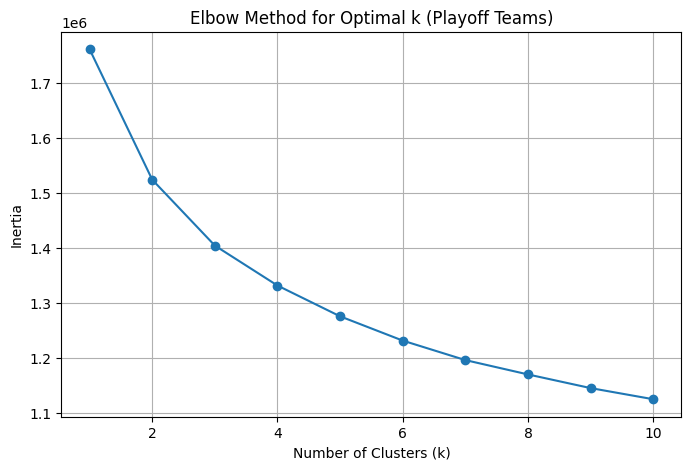

In [15]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k (Playoff Teams)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

From the elbow method we can see that the decrease starts to level out at between 2 and 4ish clusters

---

# 📊 Find the Optimal Number of Clusters (Silhouette Method)

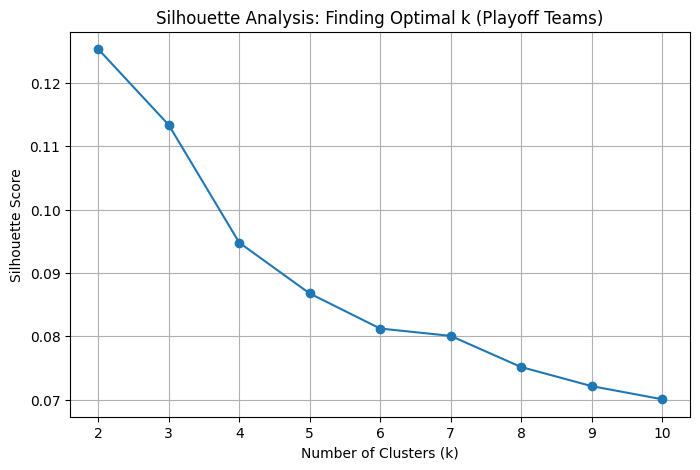

In [16]:
# Range of k values (must start at 2 because silhouette needs at least 2 clusters)
k_range = range(2, 11)

silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(cluster_df_scaled)
    score = silhouette_score(cluster_df_scaled, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis: Finding Optimal k (Playoff Teams)')
plt.grid(True)
plt.show()

The silhouette method suggests that we should use 2 clusters.

---

# 🛠️ Apply K-Means Clustering

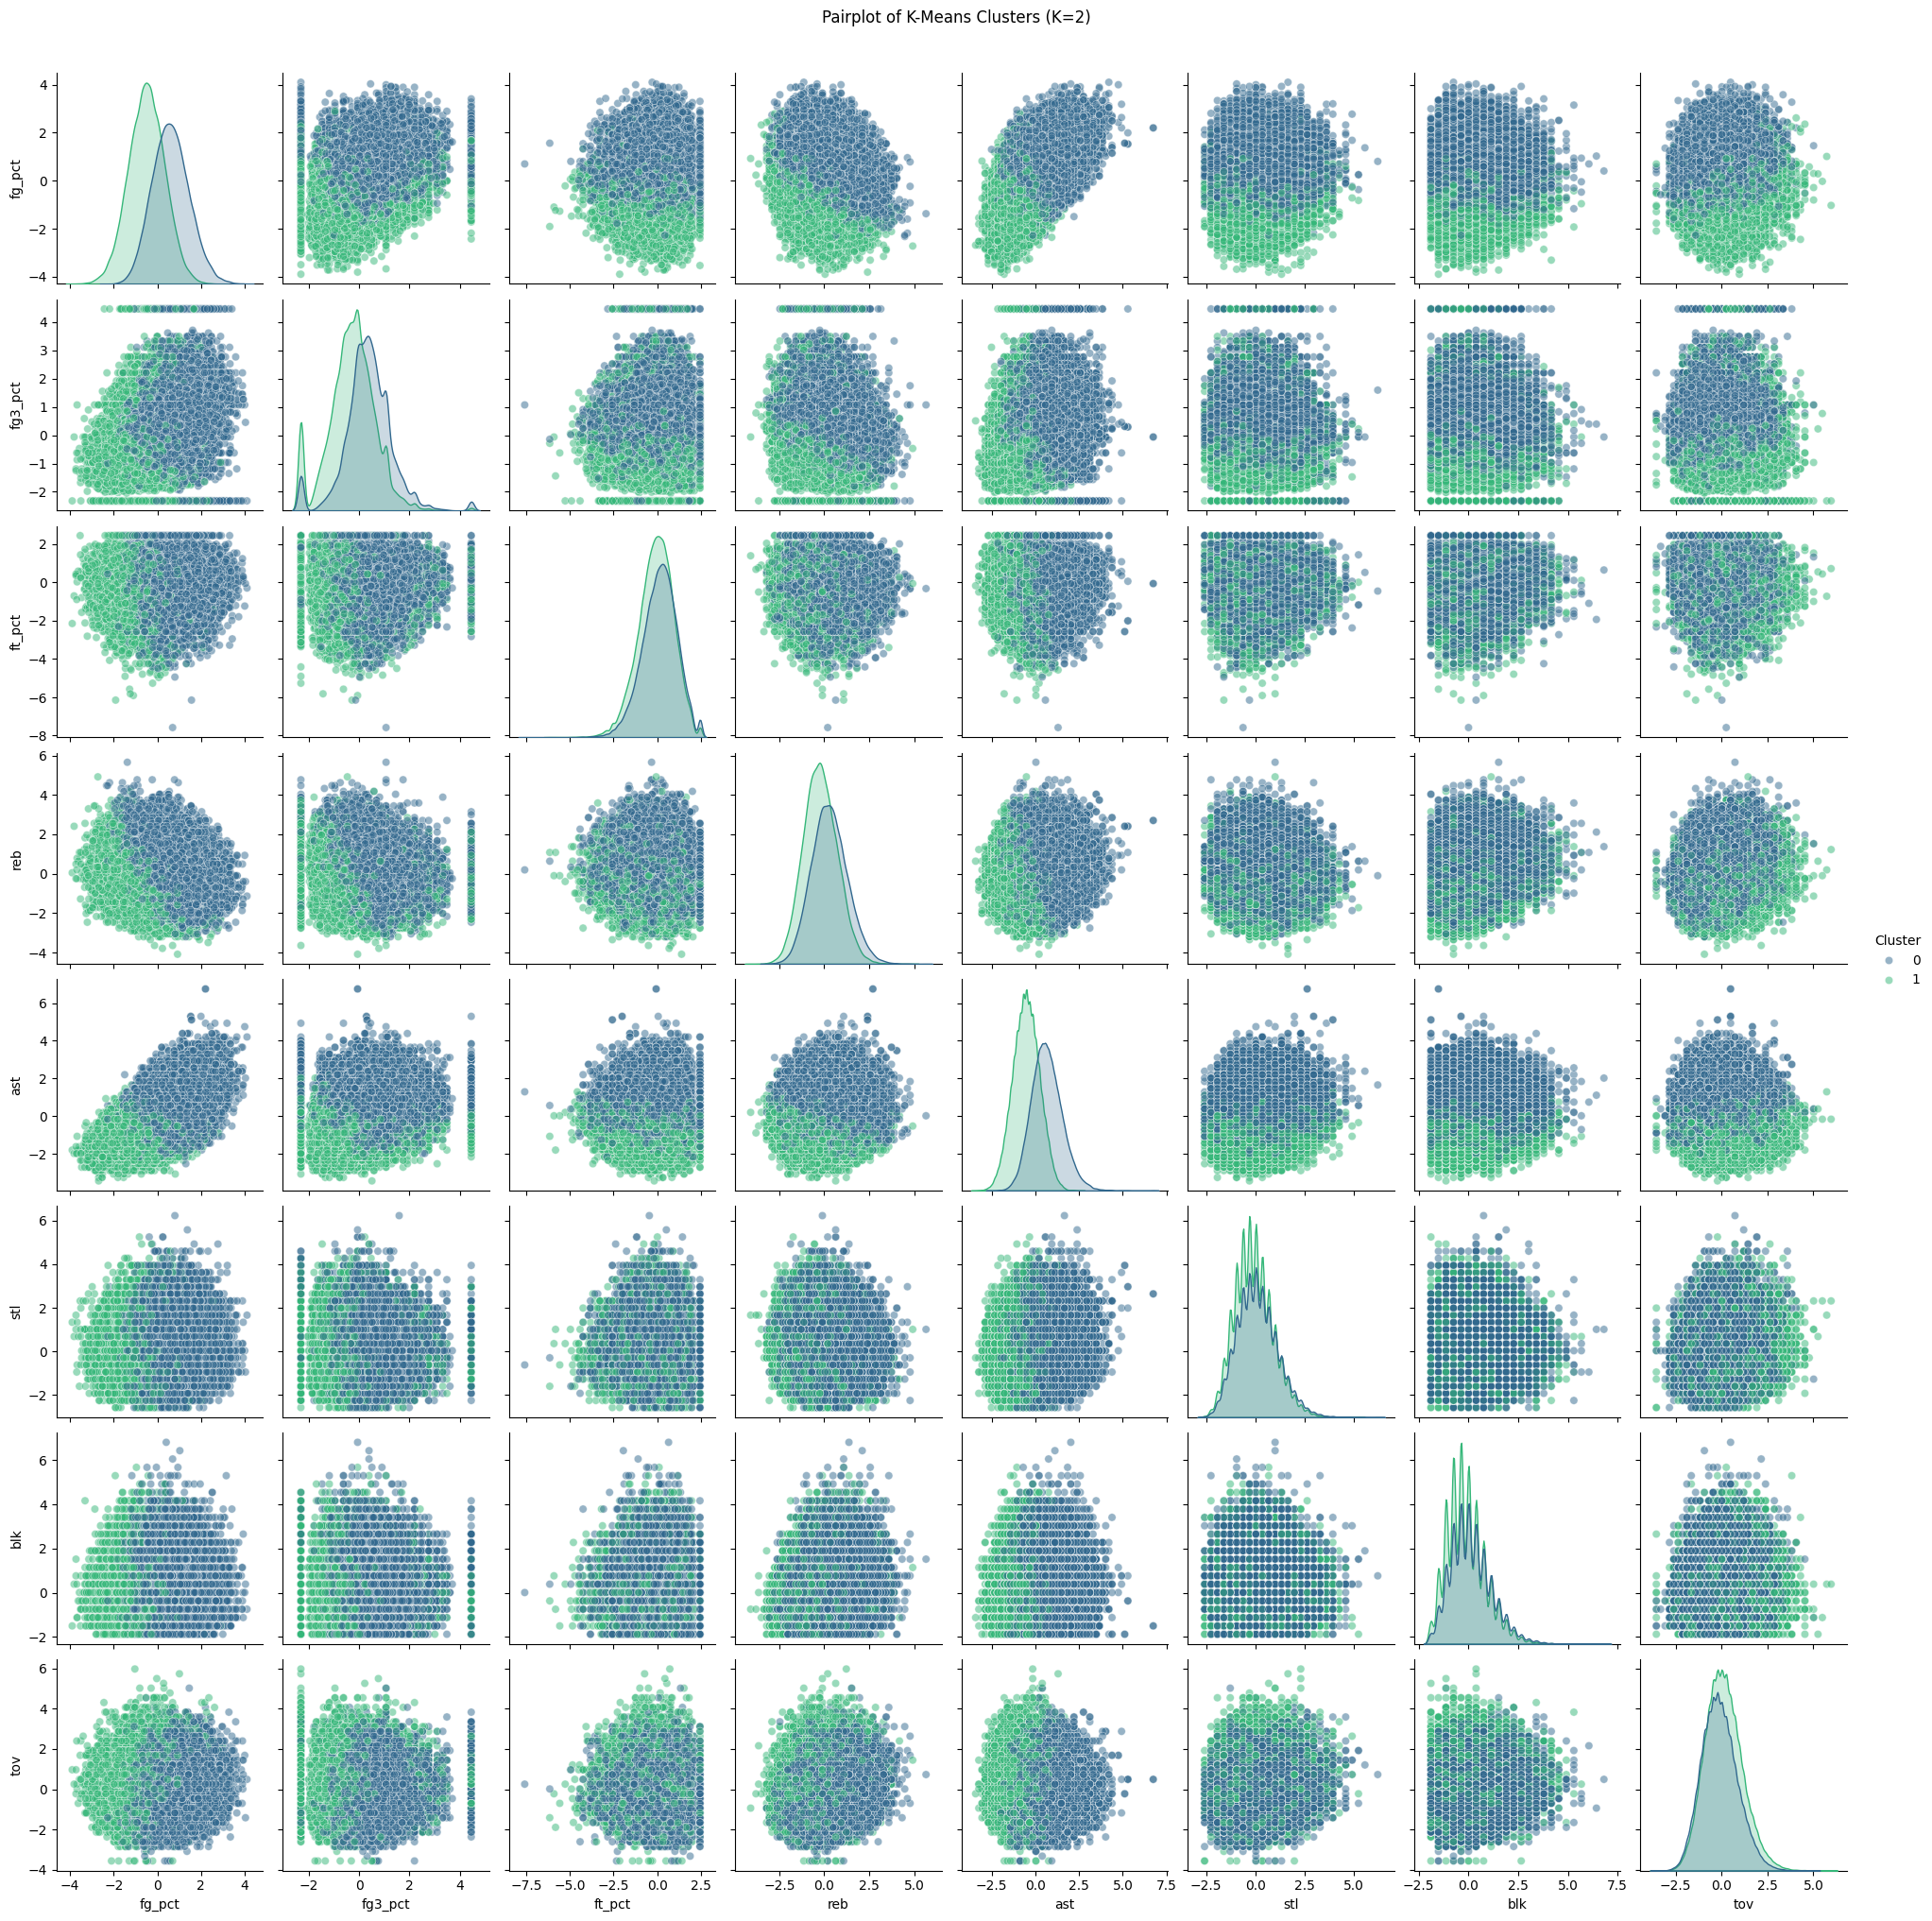

In [17]:
k = 2  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(cluster_df_scaled)

# Convert the scaled array back to a DataFrame (so seaborn can plot column names)
cluster_df_with_labels = pd.DataFrame(cluster_df_scaled, columns=feature_names)

# Add the cluster labels from sklearn KMeans
cluster_df_with_labels['Cluster'] = labels

# Pairplot
sns.pairplot(
    cluster_df_with_labels,
    vars=['fg_pct', 'fg3_pct', 'ft_pct', 'reb',
    'ast', 'stl', 'blk', 'tov'],  # Pick 3-5 important stats
    hue='Cluster',  # Color points by sklearn cluster labels
    diag_kind='kde',
    palette='viridis',
    plot_kws={'alpha': 0.5}
)

plt.suptitle(f'Pairplot of K-Means Clusters (K={k})', y=1.02)
plt.show()

The pairplot above shows a lack of seperation in clusters, indicating that k-means clustering is likely not the best approach to use when analysing this data.

Some plots are slightly sorted at least such as the fg_pct and tov plot.

# 📈 Logistic Regression Analysis

In [24]:
# Select features and target
# stats that are directly related to the number of points made(pts, plus_minus, ftm, fgm, fg3m)
# left out since we are analysing indavidual team preformance, not match up performance.
features = [
    'fga', 'fg_pct', 'fg3a', 'fg3_pct',
    'fta', 'ft_pct', 'oreb', 'dreb', 'reb',
    'ast', 'stl', 'blk', 'tov', 'pf'
]

X = final_df[features]
y = final_df['wl']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=41)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Analyze feature importance
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print(feature_importance)

Accuracy: 0.8417502967519154
Confusion Matrix:
 [[7864 1437]
 [1496 7737]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      9301
         1.0       0.84      0.84      0.84      9233

    accuracy                           0.84     18534
   macro avg       0.84      0.84      0.84     18534
weighted avg       0.84      0.84      0.84     18534

    Feature  Coefficient
1    fg_pct    27.374584
5    ft_pct     4.538816
3   fg3_pct     2.799947
10      stl     0.348232
8       reb     0.207538
7      dreb     0.112574
11      blk     0.103085
6      oreb     0.094964
9       ast     0.062701
4       fta     0.036181
2      fg3a     0.003879
13       pf    -0.061026
0       fga    -0.165169
12      tov    -0.287553


C:\Users\jjl\AppData\Local\Temp\ipykernel_3480\697535337.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')


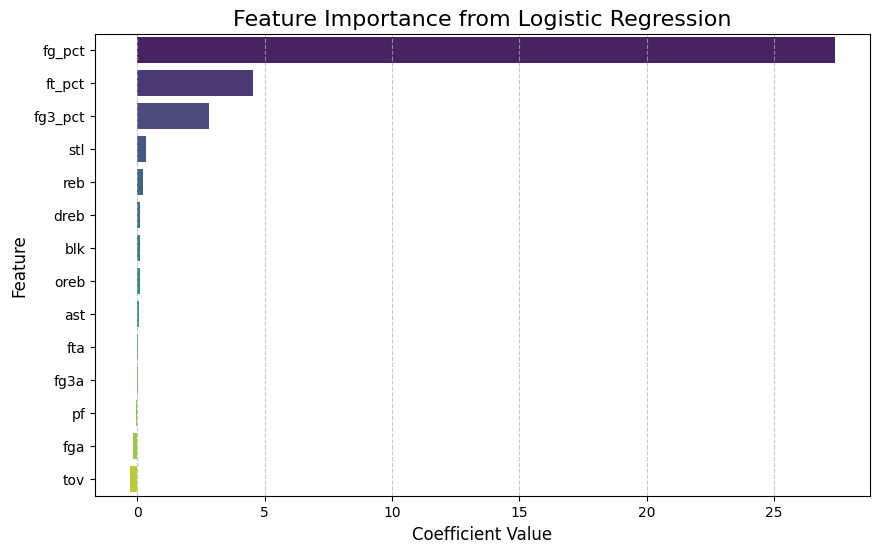

In [26]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance from Logistic Regression', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Our logistic regression model can predict the winner of a game based on the selected features with 84% accuracy!
- The Coefficient values in the output indicate the direction and magnitude of each feature's impact on the win/loss outcome.
- Positive coefficients increase the likelihood of a win, while negative coefficients decrease it.

- field goal percent, free throw percent, and three-pointer percentage are the best indicators win/loss in that order. This makes sense because those statistics are directly tied to the points scored.
- All other stats have little indavidual impact on the outcome of any given game.
- As you might expect, turnovers and fouls have a negative impact on winning the game.
- Scoring a high percentage of shots taken is by far the best predictor for winning.